In [15]:
pip install pandas openpyxl pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 807.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import openpyxl
from PIL import Image

In [ ]:
df = pd.read_excel("data/Frame Auto.xlsx", sheet_name="Birthdays")
df

,January,February
0,Mathew Sullivan,Rico Robertson
1,Carter Guerrero,Milton Mann
2,Marley Dale,Julie Horne
3,Harold Griffith,Laila Mueller
4,Alysha Davidson,Grace Leach


In [76]:
feb_names = df.February

In [39]:
from PIL import Image, ImageDraw, ImageChops

def make_circular(image_path):

    img = Image.open(image_path).convert("RGBA")
    width, height = img.size
    
    # Create a mask with a circular shape
    mask = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, width, height), fill=255)
    
    mask = mask.resize((width, height), Image.LANCZOS)
    
    img.putalpha(mask)

    return img

# Example usage:
# circular_image = make_circular("images/person1.jpg") # Replace "your_image.jpg" with the actual path
# circular_image.show()
# circular_image.save("circular_image.png") # Save as PNG to preserve transparency

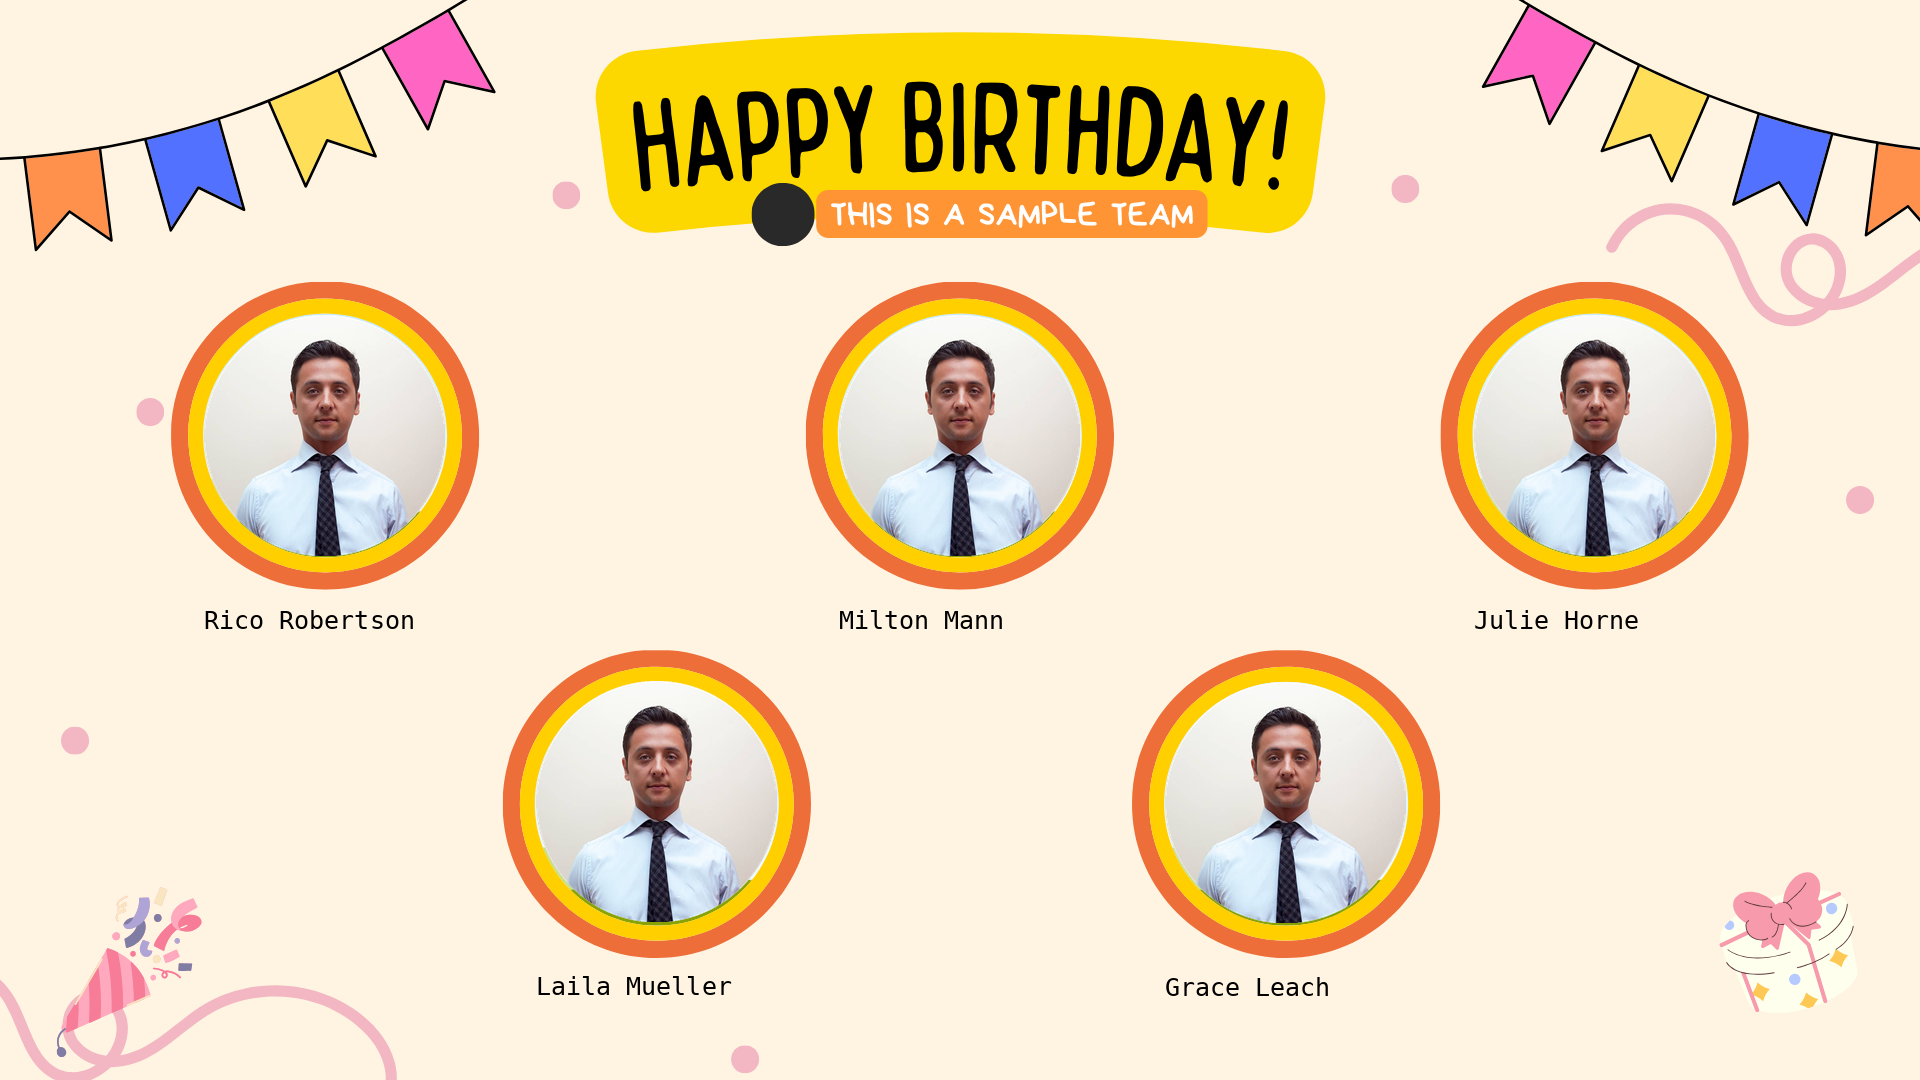

In [ ]:
from PIL import Image, ImageDraw, ImageFont


coord_arr_5 = [[204, 315], [839, 315], [1474, 315], [536, 681], [1165,682]]
def make_circular(image_path):
    img = Image.open(image_path).convert("RGBA")
    width, height = img.size
    
    mask = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, width, height), fill=255)
    
    img.putalpha(mask)
    return img



# Load background
background = Image.open("backgrounds/bg1.png").convert("RGBA")

# Process person image
circular_image = make_circular("images/person1.jpg")
resize_value = 241
resized_image = circular_image.resize((resize_value, resize_value), Image.LANCZOS)

# Paste using alpha channel as mask to avoid black edges
x = 204 
y = 315 



counter = 0


while counter < len(coord_arr_5):
    x = coord_arr_5[counter][0]
    y = coord_arr_5[counter][1]
    background.paste(resized_image, (x , y), resized_image)


    draw = ImageDraw.Draw(background)

    # Font 
    font = ImageFont.truetype("DejaVuSansMono.ttf", size=25)

    # Specify the text and its position
    text = feb_names[counter]
    text_offset = 290
    text_position = (x, y + text_offset)

    # Choose text color
    text_color = (0, 0, 0)

    draw.text(text_position, text, fill=text_color, font=font)

    counter = counter + 1

    # save the file, with a file format [Dept]-month-Category-counter


# Show the final result
background.show()


TODO: 
- calculate image and text offset to make the anchor point be the middle
- read the name and image path from the excel file 
- use the appropriate canvas when of number of people 

TODO: 
- manipulate the excel file  
- combine old data with the past data 

TODO: 
- Make this into a video, save it and get the duration 
- Set this duration in the software upload and observe how it will play

TODO: 
- Make the borders by code, only put the colors and done. 
